In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
%matplotlib inline

# Reading the dataset

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = r"C:\Users\Admin\Desktop\Freelancing\Capstone Project\TESLA.csv"
Tesla = pd.read_csv(file_path, low_memory=False)
Tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


# Target Variable Identification

In [3]:
Tesla_closed = Tesla["Close"]
Tesla_closed

0      260.436676
1      258.493347
2      258.406677
3      260.510010
4      260.196655
          ...    
248    275.329987
249    276.010010
250    282.940002
251    287.809998
252    268.209991
Name: Close, Length: 253, dtype: float64

# Visualizing the Distribution of the Target Variable

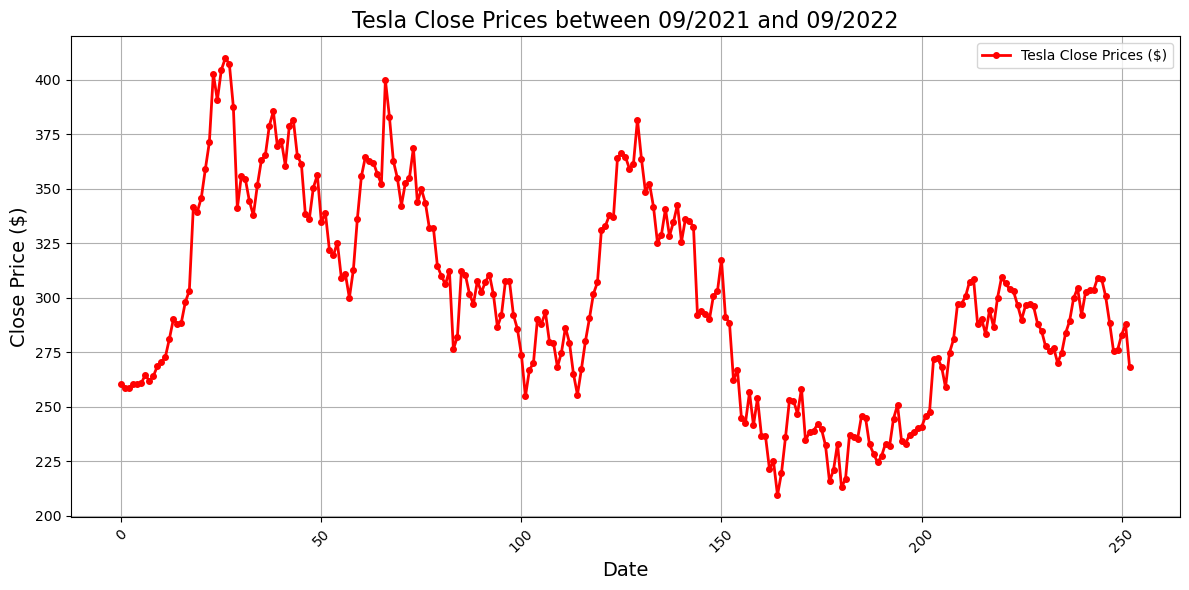

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(Tesla_closed.index, Tesla_closed, label='Tesla Close Prices ($)', color='red', linewidth=2, marker='o', markersize=4)
plt.title('Tesla Close Prices between 09/2021 and 09/2022', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price ($)', fontsize=14)
plt.grid(True)  # Adds a grid for easier reading
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

# Basic Level Data Exploration

In [5]:
# Calculating the mean and standard deviation of Tesla close prices
mean_tesla_close = Tesla_closed.mean()
std_deviation = Tesla_closed.std()

# Printing the results with formatted output for better readability
print(f"Mean of Tesla Close Prices: ${mean_tesla_close:.2f}")
print(f"Standard Deviation of Tesla Close Prices: ${std_deviation:.2f}")

Mean of Tesla Close Prices: $299.71
Standard Deviation of Tesla Close Prices: $45.79


# Identifying and Rejecting Useless Columns

In [6]:
# Assuming 'Adj Close' is redundant if 'Close' is used
Tesla = Tesla.drop(['Adj Close'], axis=1)

# Check the modified DataFrame
print(Tesla.head())


         Date        Open        High         Low       Close    Volume
0  2021-09-29  259.933319  264.500000  256.893341  260.436676  62828700
1  2021-09-30  260.333344  263.043335  258.333344  258.493347  53868000
2  2021-10-01  259.466675  260.260010  254.529999  258.406677  51094200
3  2021-10-04  265.500000  268.989990  258.706665  260.510010  91449900
4  2021-10-05  261.600006  265.769989  258.066681  260.196655  55297800


# Visual Exploratory Data Analysis (EDA)

 ## 1. Distribution of Individual Variables - Histogram

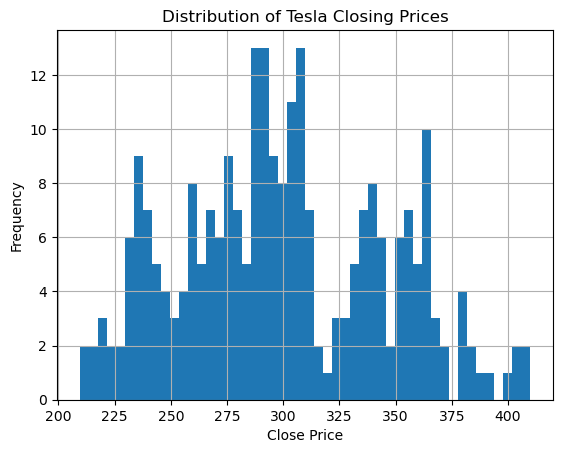

In [7]:
# Plot a histogram for the 'Close' prices
Tesla['Close'].hist(bins=50)
plt.title('Distribution of Tesla Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

## 2. Time Series Plot - Line Plot

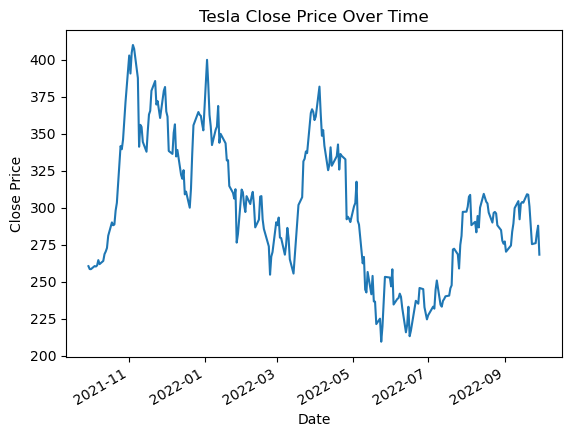

In [8]:
Tesla['Date'] = pd.to_datetime(Tesla['Date'])  # Ensure 'Date' is datetime type
Tesla.set_index('Date')['Close'].plot()
plt.title('Tesla Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


## 3. Relationship Between Variables - Scatter Plot

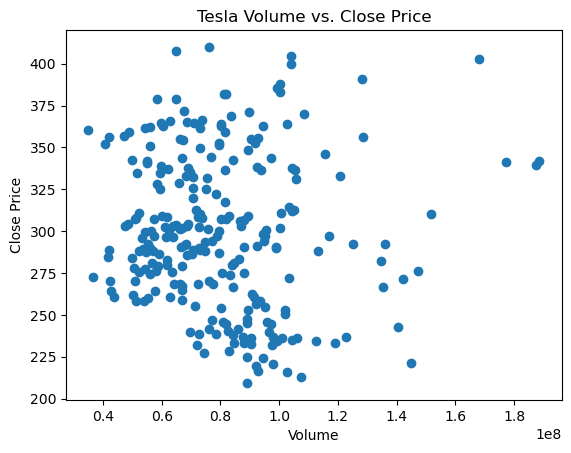

In [9]:
plt.scatter(Tesla['Volume'], Tesla['Close'])
plt.title('Tesla Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()


## 4. Box Plots

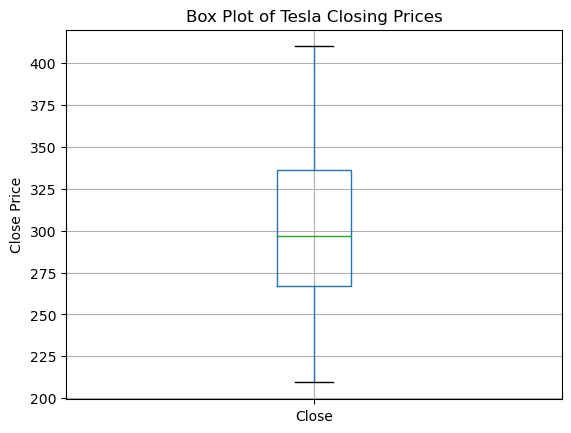

In [10]:
Tesla.boxplot(column='Close')
plt.title('Box Plot of Tesla Closing Prices')
plt.ylabel('Close Price')
plt.show()


## 5. Heatmaps of Correlation

C:\Users\Admin\AppData\Local\Temp\ipykernel_10964\3938456952.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Tesla.corr()


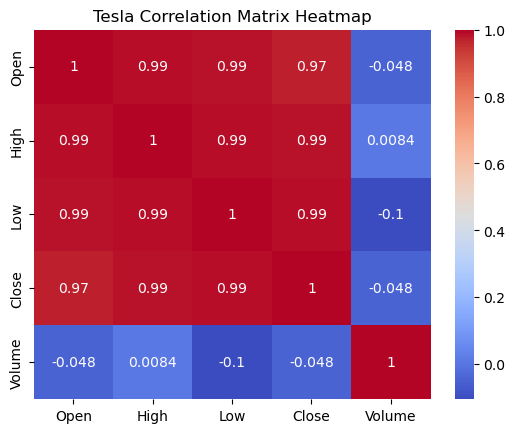

In [11]:
import seaborn as sns

corr_matrix = Tesla.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Tesla Correlation Matrix Heatmap')
plt.show()


# Feature Selection Based on Data Distribution

In [12]:
Tesla_closed_series = Tesla[['Date','Close']]
Tesla_closed_series

,Date,Close
0,2021-09-29,260.436676
1,2021-09-30,258.493347
2,2021-10-01,258.406677
3,2021-10-04,260.510010
4,2021-10-05,260.196655
...,...,...
248,2022-09-23,275.329987
249,2022-09-26,276.010010
250,2022-09-27,282.940002
251,2022-09-28,287.809998


# Removal of Outliers and Missing Values

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10964\110248233.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Tesla.fillna(Tesla.median(), inplace=True)


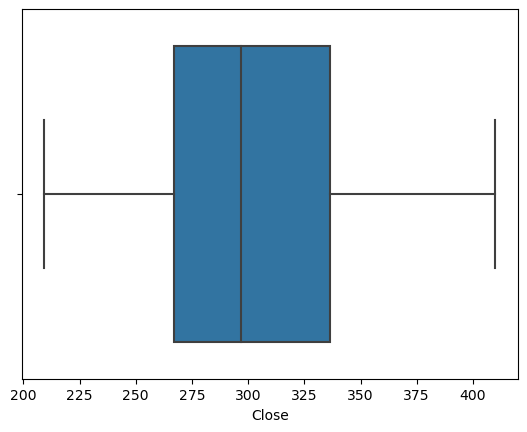

In [13]:
# Checking for missing values
missing_data = Tesla.isnull().sum()
print(missing_data)

# Impute missing values with the median
Tesla.fillna(Tesla.median(), inplace=True)


# Box plot for detecting outliers in 'Close' price
sns.boxplot(x=Tesla['Close'])

# Removing outliers using the IQR
Q1 = Tesla['Close'].quantile(0.25)
Q3 = Tesla['Close'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for the acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the data
Tesla = Tesla[(Tesla['Close'] >= lower_bound) & (Tesla['Close'] <= upper_bound)]


# Visual and Statistical Correlation Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_10964\4157908486.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Tesla.corr()


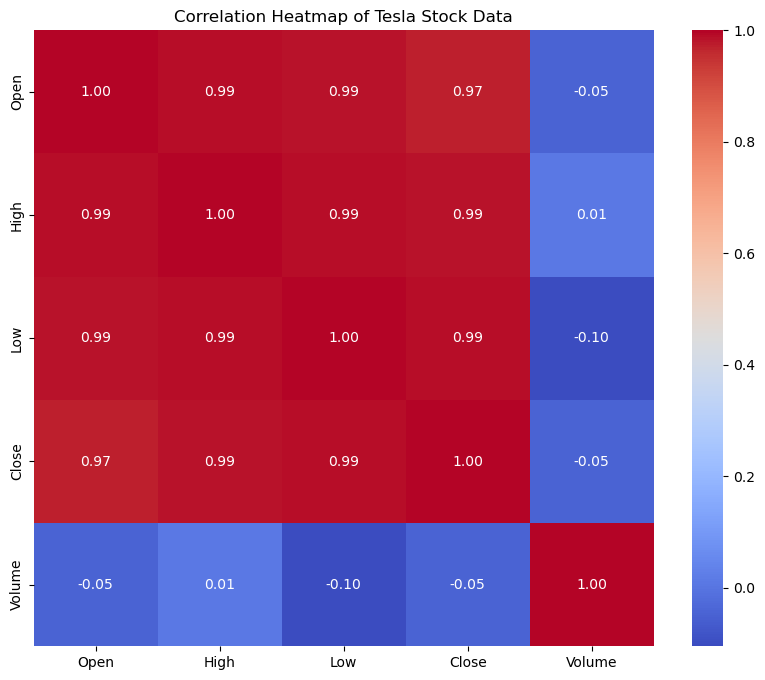

Close     1.000000
Low       0.990137
High      0.986715
Open      0.971783
Volume   -0.047791
Name: Close, dtype: float64


            Open      High       Low     Close    Volume
Open    1.000000  0.990179  0.985163  0.970188 -0.112273
High    0.990179  1.000000  0.987423  0.985155 -0.068552
Low     0.985163  0.987423  1.000000  0.988242 -0.160376
Close   0.970188  0.985155  0.988242  1.000000 -0.113230
Volume -0.112273 -0.068552 -0.160376 -0.113230  1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_10964\4157908486.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_close = Tesla.corr()['Close'].sort_values(ascending=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10964\4157908486.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = Tesla.corr(method='spearman')


In [14]:
# Calculate correlation matrix
corr_matrix = Tesla.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Tesla Stock Data')
plt.show()

# Example: Pearson correlation coefficient between 'Close' and other variables
correlation_with_close = Tesla.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)

print('\n')
# Calculate Spearman's correlation
spearman_corr = Tesla.corr(method='spearman')
print(spearman_corr)


# Predicting Tesla Stock Prices Using LSTM Neural Networks

Epoch 1/200


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.2493 - val_loss: 0.1085
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1682 - val_loss: 0.0422
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0748 - val_loss: 0.0084
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0353 - val_loss: 0.0185
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0313 - val_loss: 0.0046
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0263 - val_loss: 0.0054
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0230 - val_loss: 0.0050
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0220 - val_loss: 0.0063
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0194 - val_loss: 0.0051
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0229 - val_loss: 0.0051
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0182 - val_loss: 0.0052
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0171 - val_loss: 0.0052


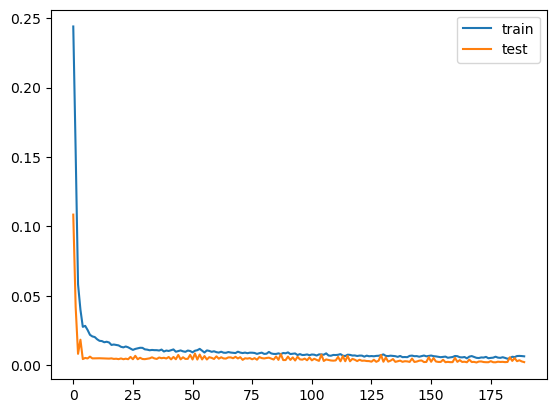

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

Tesla['Date'] = pd.to_datetime(Tesla['Date'])  # Ensure 'Date' is datetime type
Tesla.set_index('Date', inplace=True)  # Set 'Date' as the index

# Select 'Close' price for forecasting
Tesla_closed_series = Tesla[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
Tesla_closed_series = scaler.fit_transform(Tesla_closed_series)

# Split the data into training and testing sets
train_size = int(len(Tesla_closed_series) * 0.80)
test_size = len(Tesla_closed_series) - train_size
train_data, test_data = Tesla_closed_series[0:train_size], Tesla_closed_series[train_size:len(Tesla_closed_series)]

# Create sequences for LSTM training
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 10  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions and actual values to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform([y_train])
y_test_inv = scaler.inverse_transform([y_test])

# Calculate RMSE for evaluation
train_score = np.sqrt(mean_squared_error(y_train_inv[0], train_predict[:,0]))
test_score = np.sqrt(mean_squared_error(y_test_inv[0], test_predict[:,0]))

print(f"Train RMSE: {train_score:.4f}")
print(f"Test RMSE: {test_score:.4f}")

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
